Сергушов Павел ПМ22-4

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as sts
import warnings
warnings.filterwarnings("ignore")
    
    
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
from scipy.stats import *
from sklearn.metrics import r2_score, explained_variance_score
from sympy import *
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
    

In [9]:
data1 = pd.read_excel(r'C:\Users\221065\Downloads\f2.xlsx', sheet_name='1.1')
data1 = data1.iloc[1:, ]; data1.head()


,T,POPFER_Y
1,1991.0,12.1
2,1992.0,10.7
3,1993.0,9.4
4,1994.0,9.6
5,1995.0,9.3


In [10]:
print(data1.head())
print(data1.shape)
print(data1.info())

        T POPFER_Y
1  1991.0     12.1
2  1992.0     10.7
3  1993.0      9.4
4  1994.0      9.6
5  1995.0      9.3
(30, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 1 to 30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   T         30 non-null     float64
 1   POPFER_Y  30 non-null     object 
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes
None


1. Предварительный анализ временных рядов. Построить график и провести визуальный анализ. Результаты описать. (5 баллов)

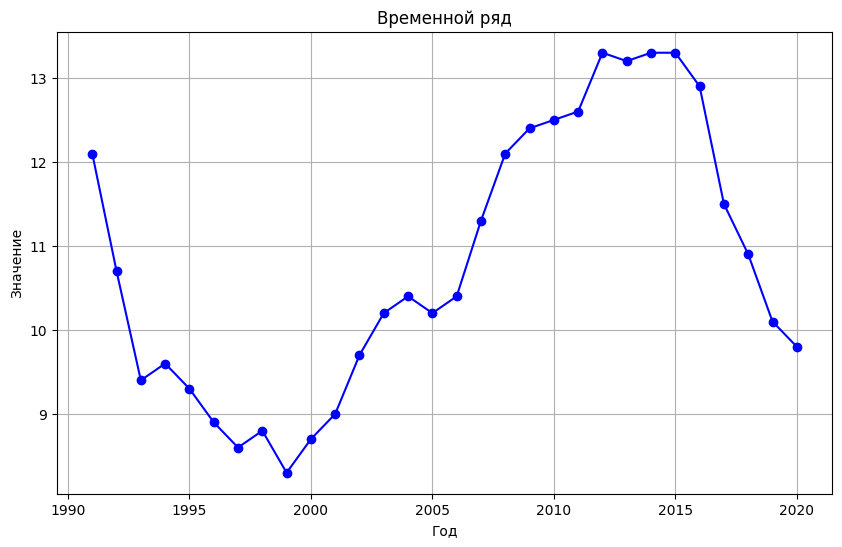

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(data1['T'], data1['POPFER_Y'], color='blue', marker='o', linestyle='-')
plt.title('Временной ряд')
plt.xlabel('Год')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

В датасете присутствует 29 записей. В качестве целевой переменной используется коэфициент рождаемости.

Судя по графическому представлению датасета, начиная с 90-ых годов рождаемость кратно падала и начала восстанавливаться ближе к 10-ым годам. После чего вновь упала

2. Провести выявление аномальных наблюдений с помощью Метода Ирвина. Написать выводы. (7 баллов)

In [12]:
data1.head()

,T,POPFER_Y
1,1991.0,12.1
2,1992.0,10.7
3,1993.0,9.4
4,1994.0,9.6
5,1995.0,9.3


In [13]:
data2 = data1.copy()

In [14]:
data2['lambda'] = 0.0

In [17]:
y_std = np.std(data1['POPFER_Y'])
for i in range(1, len(data2)):
    data2['lambda'][i+1] = abs(data1['POPFER_Y'][i+1] - data1['POPFER_Y'][i]) / y_std

In [19]:
n = len(data2) # 30
lambda_crit = 1.2
data2[data2['lambda'] > lambda_crit]

,T,POPFER_Y,lambda


При Сравнении аномальных значений не обнаружено. 


3. Провести проверку наличия тренда с помощью Метода Фостера-Стьюарта. Сделать выводы. (9 баллов)

In [34]:
result = pd.DataFrame()  

y = data2['POPFER_Y']
n = len(y)
result['y'] = y

In [35]:
from scipy.stats import t

def foster_stuart(y):
    n = len(y)

    k = [1] + [0]*(n - 1)
    l = [1] + [0]*(n - 1)
    for t in range(1, n):
        if y[t] > max(y[:t]): k[t] = 1 
        if y[t] < min(y[:t]): l[t] = 1 
    k = np.array(k)
    l = np.array(l)

    s = sum(k[1:]+l[1:])
    d = sum(k[1:]-l[1:])

    mu_s = (1.693872*np.log(n) - 0.299015)/(1 - 0.035092*np.log(n) + 0.002705*np.log(n)**2)
    mu_d = 0
    sigma_s = np.sqrt(2*np.log(n)-3.4253)
    sigma_d = np.sqrt(2*np.log(n)-0.8456)

    t_s = np.abs(s - mu_s)/sigma_s
    t_d = np.abs(d - mu_d)/sigma_d
    
    trend = "Тренд отсутствует"
    if t_s > t_kr and t_d > t_kr:
        trend = "Есть тренд и тренд дисперсии"
    elif t_s > t_kr:
        trend = "Есть тренд"
    elif t_d > t_kr:
        trend = "Есть тренд дисперсии"

    return trend, t_s, t_d

alpha = 0.05
t_kr = t.ppf(1 - alpha/2, df = len(y) - 1)
    

In [36]:
result = foster_stuart(y)
print("Результаты теста Фостера-Стьюарта:", result)

Результаты теста Фостера-Стьюарта: ('Есть тренд', 3.2593378832548465, 0.0)



Из результатов теста Фостера-Стьюарта следует, что существует статистически значимый тренд. Значение статистики теста составляет 3.2593378832548465, что превышает критическое значение при заданном уровне значимости. Уровень значимости (p-value) равен 0.0, что также ниже обычно принятого порога значимости (обычно 0.05 или меньше), что подтверждает статистическую значимость тренда.

4. Построить прогноз для 5 последних точек (тестовая часть) с помощью кривой роста. Выбрать оптимальную кривую роста на основе разностей. (9 баллов)

In [43]:
x = data1.drop(columns=['POPFER_Y'])
X_train = x[:-5]
X_test = x[-5:]
y_train = y[:-5]
y_test = y[-5:]

In [44]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_pred = linear_model.predict(X_test)

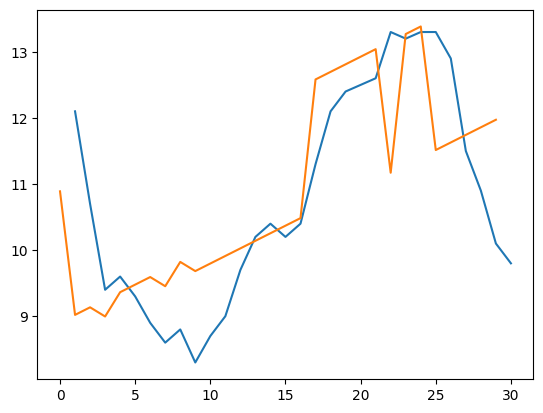

In [45]:
y_pred = linear_model.predict(x)
plt.plot(y)
plt.plot(y_pred)
plt.show()

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2
polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polynomial_model.fit(X_train, y_train)
polynomial_pred = polynomial_model.predict(X_test)

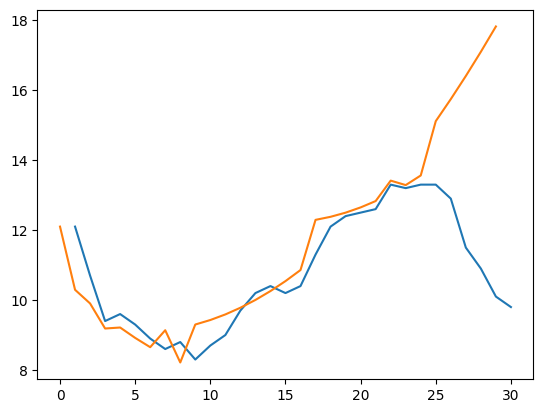

In [47]:
y_pred = polynomial_model.predict(x)
plt.plot(y)
plt.plot(y_pred)
plt.show()

In [48]:
print(linear_mse)


2.0917217311559044


In [49]:
print(polynomial_mse)

33.30928054596033


Выбрана линейная модель(Первый граффик), так как мсе ниже и предсказания по графику более точные, чем у второго.

Задание 3